# TFM FINTECH

## LIBRERIAS

In [22]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np
# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# Nulos
import missingno as msno
# Expresiones regulares
import re
#from fuzzywuzzy import process
# Fechas
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


## FUNCIONES

In [2]:
def check_df(df, tipo=''):
    if tipo == 'simple':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
  
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cuáles son las variables numéricas?")
        df_numericas = df.select_dtypes(include = 'number')
        columnas_numericas = list(df_numericas.columns)
        print(columnas_numericas)
        print('\n########################################################################################')

        print("¿Cuáles son las variables categóricas?")
        df_categoricas = df.select_dtypes(include = 'object')
        columnas_categoricas = list(df_categoricas.columns)
        print(columnas_categoricas)
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        if len(columnas_numericas)>0:
            print("¿Cuáles son las estadísticas descriptivas básicas de las columnas numéricas?")
            display(df.describe(include = 'number'))
            print('\n########################################################################################')

        if len(columnas_categoricas)>0:
            print("¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?")
            display(df.describe(include = 'object'))


## - Limpieza de datos
### 2. id_valores_problem(): Identificación de valores problemáticos (nulos, duplicados y outliers)

def id_valores_problem(df, columnas=[]):
    print('###################################################################################')
    print('3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:')
    print(round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending= False))
    print('###################################################################################')
    print(f'3.1.2. Número de DUPLICADOS totales: {df.duplicated().sum()}')
    print('###################################################################################')
    if len(columnas) > 0:
        print(f'3.1.2. Número de DUPLICADOS parciales según las columnas {columnas}: {df.duplicated(subset=columnas).sum()}')
        print('###################################################################################')
    df_numericas = df.select_dtypes(include = 'number')
    columnas_numericas = list(df_numericas.columns)
    if len(columnas_numericas) > 0:
        print('3.1.3. Columnas numéricas con OUTLIERS')
        for var in columnas_numericas:
            Q1 = df[var].quantile(0.25)
            Q3 = df[var].quantile(0.75)
            limite_inferior = Q1 - 1.5 * (Q3 - Q1)
            limite_superior = Q3 + 1.5 * (Q3 - Q1)
            outliers = df[(df[var] < limite_inferior) | (df[var] > limite_superior)]
            print(f'Número de outliers en la columna "{var}": {outliers.shape[0]}')
        print('###################################################################################')

## CARGA DE TABLA

In [3]:
df = pd.read_csv(r'C:\Users\juand\Documents\Nuclio\TFM_Fintech\bank-additional_bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## ANALISIS EXPLORATORIO

In [4]:
check_df(df)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 41,188 filas y 21 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
26679,56,retired,married,basic.4y,no,yes,yes,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
39925,44,self-employed,divorced,professional.course,no,yes,no,cellular,jun,thu,...,1,999,0,nonexistent,-1.7,94.055,-39.8,0.742,4991.6,yes
16291,28,blue-collar,married,basic.9y,no,no,no,telephone,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
5581,45,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
25004,51,admin.,married,high.school,no,no,yes,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no



########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object     11
int64       5
float64     5
Name: count, dtype: int64

#######################################################

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [5]:
id_valores_problem(df)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 12
###################################################################################
3.1.3. Columnas numéricas con OUTLIERS
Número de outliers en la columna "age": 469
Número de outliers en la columna "duration": 2963
Número de outliers e

1. Distribución de Columnas Numéricas
Visualiza y describe la distribución de edad:

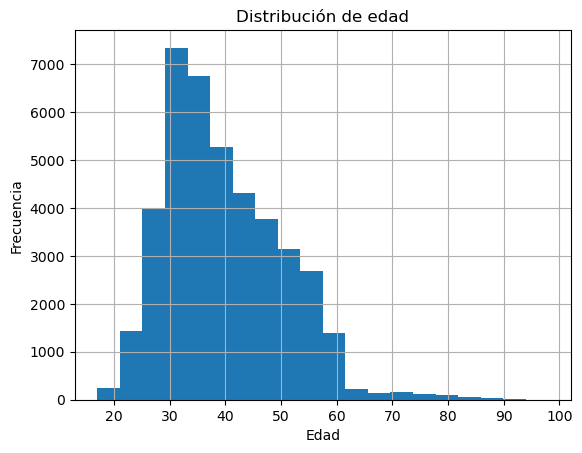

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [6]:
import matplotlib.pyplot as plt

# Histograma de edad
df['age'].hist(bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edad')
plt.show()

# Estadísticos descriptivos de la edad
print(df['age'].describe())

2. Frecuencia de Valores Categóricos
Frecuencias de tipos de trabajo (job):

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


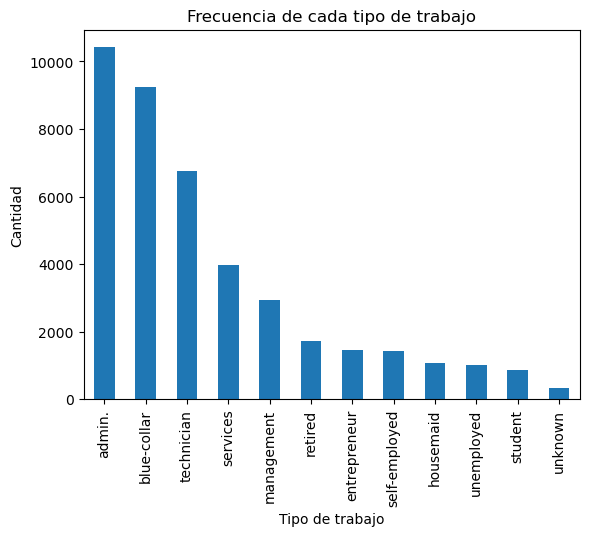

In [7]:
# Conteo de cada tipo de trabajo
print(df['job'].value_counts())

# Gráfico de barras para ver distribución de trabajos
df['job'].value_counts().plot(kind='bar')
plt.xlabel('Tipo de trabajo')
plt.ylabel('Cantidad')
plt.title('Frecuencia de cada tipo de trabajo')
plt.show()

3. Tasa de Conversión Global
Proporción de clientes que suscribieron (y='yes'):



In [8]:
# Tasa de conversión global
conversion_rate = df['y'].value_counts(normalize=True)['yes']
print(f'Tasa de conversión global: {conversion_rate:.2%}')

Tasa de conversión global: 11.27%


4. Tasa de Conversión por Segmento
Ejemplo: por tipo de trabajo (job):

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: yes, dtype: float64


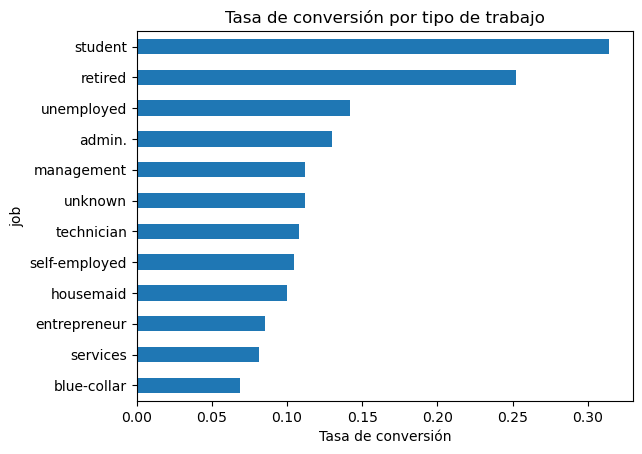

In [9]:
# Tasa de conversión por tipo de trabajo
conversion_by_job = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)
print(conversion_by_job['yes'])

# Gráfica para visualizarlo
conversion_by_job['yes'].sort_values().plot(kind='barh')
plt.xlabel('Tasa de conversión')
plt.title('Tasa de conversión por tipo de trabajo')
plt.show()

5. Duración Promedio del Contacto Según Resultado

In [10]:
# Duración promedio para quienes dijeron 'yes' y 'no'
duration_mean = df.groupby('y')['duration'].mean()
print(duration_mean)

y
no     220.844807
yes    553.191164
Name: duration, dtype: float64


6. Segmentación Demográfica: Edad y Conversión

In [11]:
# División de la edad en grupos y comparar tasas de conversión
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])
age_conversion = df.groupby('age_group')['y'].value_counts(normalize=True).unstack()['yes']
print(age_conversion)

age_group
18-30    0.151020
31-45    0.093656
46-60    0.095596
60+      0.454945
Name: yes, dtype: float64


C:\Users\juand\AppData\Local\Temp\ipykernel_11768\2636668161.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_conversion = df.groupby('age_group')['y'].value_counts(normalize=True).unstack()['yes']


7. Análisis de Intentos de Contacto
Relación entre número de contactos y conversión:

y
no     2.633085
yes    2.051724
Name: campaign, dtype: float64


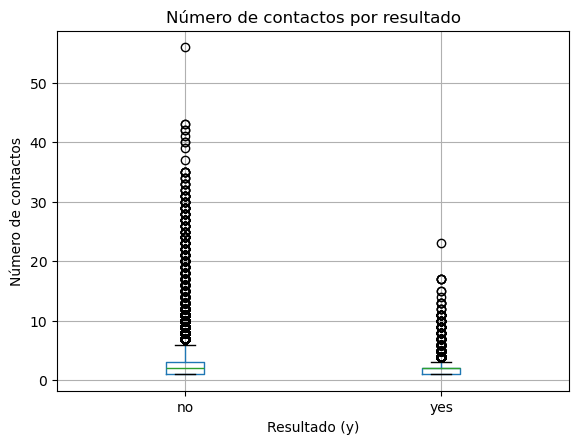

In [12]:
# Promedio de campañas (contacts) según resultado
print(df.groupby('y')['campaign'].mean())

# Boxplot
df.boxplot(column='campaign', by='y')
plt.title('Número de contactos por resultado')
plt.suptitle('')
plt.xlabel('Resultado (y)')
plt.ylabel('Número de contactos')
plt.show()

8. Resultados por Canal de Contacto

contact
cellular     0.147376
telephone    0.052313
Name: yes, dtype: float64


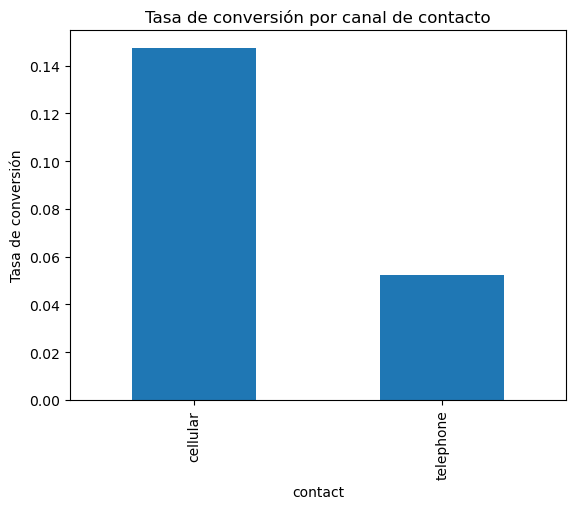

In [13]:
# Tasa de conversión por canal de contacto
conversion_by_contact = df.groupby('contact')['y'].value_counts(normalize=True).unstack().fillna(0)
print(conversion_by_contact['yes'])

conversion_by_contact['yes'].plot(kind='bar')
plt.ylabel('Tasa de conversión')
plt.title('Tasa de conversión por canal de contacto')
plt.show()

9. Correlación de Variables Económicas y Conversión

In [14]:
# Correlación entre variables numéricas y el resultado binario
df['y_bin'] = df['y'].map({'yes': 1, 'no': 0})
print(df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_bin']].corr())

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   
y_bin              -0.298334       -0.136211       0.054878  -0.307771   

                nr.employed     y_bin  
emp.var.rate       0.906970 -0.298334  
cons.price.idx     0.522034 -0.136211  
cons.conf.idx      0.100513  0.054878  
euribor3m          0.945154 -0.307771  
nr.employed        1.000000 -0.354678  
y_bin             -0.354678  1.000000  


10. Conversión por Mes

month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: yes, dtype: float64


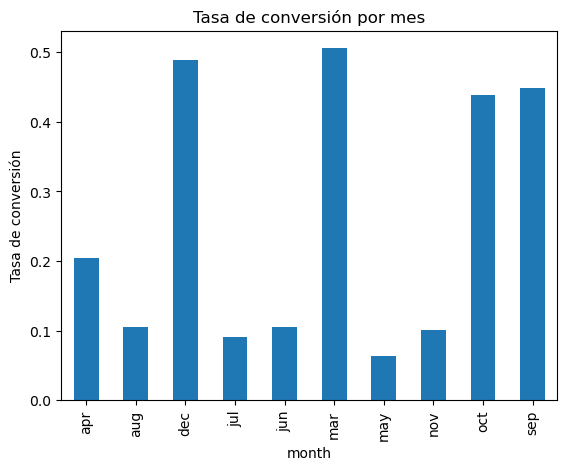

In [15]:
# Tasa de conversión por mes
conversion_by_month = df.groupby('month')['y'].value_counts(normalize=True).unstack().fillna(0)
print(conversion_by_month['yes'])

conversion_by_month['yes'].plot(kind='bar')
plt.ylabel('Tasa de conversión')
plt.title('Tasa de conversión por mes')
plt.show()

11. Tasa de Adopción de Productos
Objetivo: Saber cuántos clientes contratan más de un producto (hipoteca y préstamo).

In [20]:
df['multi_product'] = ((df['housing'] == 'yes') & (df['loan'] == 'yes')).astype(int)
adoption_rate = df['multi_product'].mean()
print(f'Tasa de adopción de múltiples productos: {adoption_rate:.2%}')

Tasa de adopción de múltiples productos: 8.96%


12. Eficiencia de Canales de Contacto
Objetivo: Comparar TC por canal.

In [21]:
conversion_by_contact = df.groupby('contact')['y'].value_counts(normalize=True).unstack().fillna(0)
print(conversion_by_contact['yes'])

contact
cellular     0.147376
telephone    0.052313
Name: yes, dtype: float64


13. Tendencias Estacionales
Objetivo: Identificar mejores meses para la campaña.

In [24]:
conversion_by_month = df.groupby('month')['y'].value_counts(normalize=True).unstack().fillna(0)
print(conversion_by_month['yes'].sort_values(ascending=False))

month
mar    0.505495
dec    0.489011
sep    0.449123
oct    0.438719
apr    0.204787
aug    0.106021
jun    0.105115
nov    0.101439
jul    0.090466
may    0.064347
Name: yes, dtype: float64
